In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
df = pd.read_csv("dataset/iris.data")

In [9]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


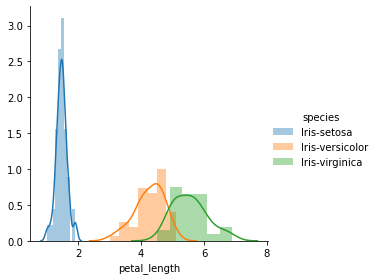

In [15]:
sns.FacetGrid(df,hue="species",height=4).map(sns.distplot,'petal_length').add_legend()

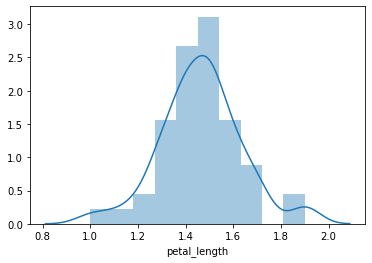

In [40]:
df_setosa = df[df["species"] == "Iris-setosa"]
sns.distplot(df_setosa["petal_length"])
# plt.hist(df_setosa["petal_length"])

### Normal Distribution

In [29]:
def normal(x,mean,sd):
    return ( 1/(math.sqrt(2*math.pi)*sd) )*math.exp(-.5* (x-mean/sd)**2 )

In [68]:
from scipy.stats import norm

x = df_setosa["petal_length"]

mean = np.mean(x)
sd = np.std(x)

y = norm.pdf(x,mean,sd)

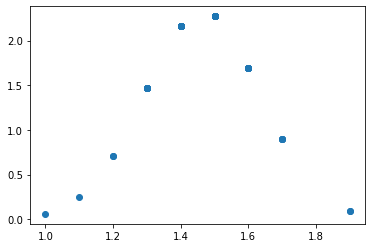

In [69]:
plt.scatter(x,y)

### Standard Normal Distribution using Z-Index

In [76]:
x = df_setosa["petal_length"]

mean = np.mean(x)
sd = np.std(x)

x = [(x-mean)/sd for i in x]
y = norm.pdf(x,mean,sd)

Mean:  1.2354561818028742e-16
Standard Deviation:  0.9999999999999998


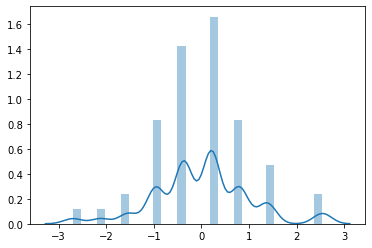

In [84]:
sns.distplot(x)
print("Mean: ",np.mean(x))
print("Standard Deviation: ",np.std(x))
# as SND mean = 0 and SD = 1

### PDF and CDF

In [95]:
x = df_setosa["petal_length"]

counts, bin_edges = np.histogram(x)

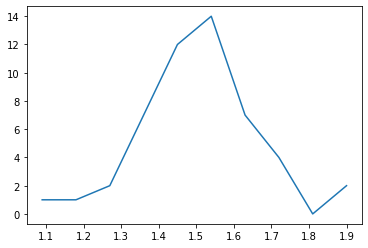

In [110]:
plt.plot(bin_edges,counts)

In [96]:
print(counts)
print(bin_edges)
bin_edges = bin_edges[1:]

[ 1  1  2  7 12 14  7  4  0  2]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


In [97]:
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


Text(0, 0.5, 'PDF / CDF')

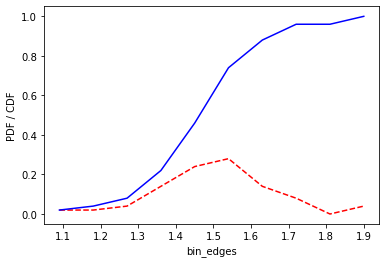

In [111]:
plt.plot(bin_edges,pdf,'r--')
plt.plot(bin_edges,cdf,"b")
plt.xlabel("bin_edges")
plt.ylabel("PDF / CDF")